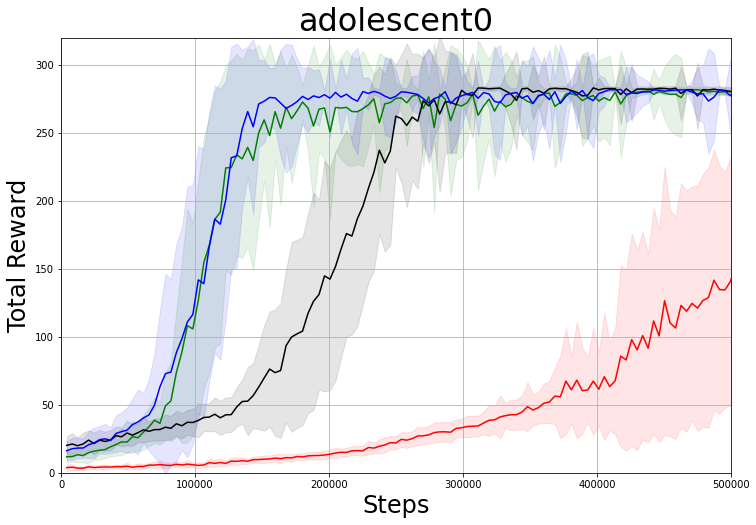

In [5]:
import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
# MAIN_PATH = config('MAIN_PATH')
MAIN_PATH = '/home/chirath/Documents/sys_control/sys_control/'
sys.path.insert(1, MAIN_PATH)
from visualiser.core import ExperimentVisualise, plot_testing_rewards, plot_training_logs, plot_value_function
from visualiser.core import plot_episode, plot_training_action_summary, plot_training_logs, timing_analysis
from visualiser.core import display_commands, plot_testing_metric, display_commands_v2, plot_testing_average_metric
import matplotlib.gridspec
%matplotlib inline 
    
# initialise experiment objects
lime, brown, orange, pink, gray, darkorange2 = '#00FF00', '#964B00', '#FFA500', '#FF1493', '#808080', '#EE7600'
darkslateblue, maroon, navyblue = '#483D8B', '#800000', '#000080'
darkgreen =  '#006400'

subject = 'adolescent0'
PATH = 'ajcai22/'+subject+'/'

# linear trans func
exp1 = ExperimentVisualise(id=PATH+'normal1', version=1.1, plot_version=1, test_seeds=5000)
exp2 = ExperimentVisualise(id=PATH+'normal2', version=1.1, plot_version=1, test_seeds=5000)
exp3 = ExperimentVisualise(id=PATH+'normal3', version=1.1, plot_version=1, test_seeds=5000)
# quadratic
exp4 = ExperimentVisualise(id=PATH+'quad1', version=1.1, plot_version=1, test_seeds=5000)
exp5 = ExperimentVisualise(id=PATH+'quad2', version=1.1, plot_version=1, test_seeds=5000)
exp6 = ExperimentVisualise(id=PATH+'quad3', version=1.1, plot_version=1, test_seeds=5000)
# proportional-quadratic
exp7 = ExperimentVisualise(id=PATH+'propquad1', version=1.1, plot_version=1, test_seeds=5000)
exp8 = ExperimentVisualise(id=PATH+'propquad2', version=1.1, plot_version=1, test_seeds=5000)
exp9 = ExperimentVisualise(id=PATH+'propquad3', version=1.1, plot_version=1, test_seeds=5000)
# exponential
exp10 = ExperimentVisualise(id=PATH+'exp1', version=1.1, plot_version=1, test_seeds=5000)
exp11 = ExperimentVisualise(id=PATH+'exp2', version=1.1, plot_version=1, test_seeds=5000)
exp12 = ExperimentVisualise(id=PATH+'exp3', version=1.1, plot_version=1, test_seeds=5000)


# plot the graphs
dis_len = 0.5 * 1000000
command = []
disp_arr = display_commands_v2(command)
exp_vis = {
              '1':{ "id":exp1, "color":'r',"show": disp_arr[1], "label":'Linear'}, 
              '2':{ "id":exp2, "color":'r',"show": disp_arr[2], "label":'Linear'},  
              '3':{ "id":exp3, "color":'r',"show": disp_arr[3], "label":'Linear'}, 
    
              '4':{ "id":exp4, "color":'g',"show": disp_arr[4], "label":'Quadratic'},  
              '5':{ "id":exp5, "color":'g',"show": disp_arr[5], "label":'Quadratic'}, 
              '6':{ "id":exp6, "color":'g',"show": disp_arr[6], "label":'Quadratic'},  
    
              '7':{ "id":exp7, "color":'k',"show": disp_arr[7], "label":'Proportional Quadratic'}, 
              '8':{ "id":exp8, "color":'k',"show": disp_arr[8], "label":'Proportional Quadratic'},
              '9':{ "id":exp9, "color":'k',"show": disp_arr[9], "label":'Proportional Quadratic'}, 
    
              '10':{ "id":exp10, "color":'b',"show": disp_arr[10], "label":'Exponential'},
              '11':{ "id":exp11, "color":'b',"show": disp_arr[11], "label":'Exponential'}, 
              '12':{ "id":exp12, "color":'b',"show": disp_arr[12], "label":'Exponential'},
}

groups = [ ['1', '2', '3'],  ['4', '5', '6'], ['7', '8', '9'],['10', '11', '12']]
plot_testing_average_metric(exp_vis, groups, type='normal', dis_len=dis_len, metric='reward', goal=288, fill=True, title=subject)


In [3]:
# calculate the efficiency metrics in the paper.

def get_exps(PATH, t):
    exp1 = ExperimentVisualise(id=PATH+'normal1', version=1.1, plot_version=1, test_seeds=5000)
    exp2 = ExperimentVisualise(id=PATH+'normal2', version=1.1, plot_version=1, test_seeds=5000)
    exp3 = ExperimentVisualise(id=PATH+'normal3', version=1.1, plot_version=1, test_seeds=5000)

    exp4 = ExperimentVisualise(id=PATH+'quad1', version=1.1, plot_version=1, test_seeds=5000)
    exp5 = ExperimentVisualise(id=PATH+'quad2', version=1.1, plot_version=1, test_seeds=5000)
    exp6 = ExperimentVisualise(id=PATH+'quad3', version=1.1, plot_version=1, test_seeds=5000)

    exp7 = ExperimentVisualise(id=PATH+'propquad1', version=1.1, plot_version=1, test_seeds=5000)
    exp8 = ExperimentVisualise(id=PATH+'propquad2', version=1.1, plot_version=1, test_seeds=5000)
    exp9 = ExperimentVisualise(id=PATH+'propquad3', version=1.1, plot_version=1, test_seeds=5000)

    exp10 = ExperimentVisualise(id=PATH+'exp1', version=1.1, plot_version=1, test_seeds=5000)
    exp11 = ExperimentVisualise(id=PATH+'exp2', version=1.1, plot_version=1, test_seeds=5000)
    exp12 = ExperimentVisualise(id=PATH+'exp3', version=1.1, plot_version=1, test_seeds=5000)

    exp_vis = {
                  '1':{ "id":exp1, "color":maroon,"show": disp_arr[1], "label":'Linear'}, 
                  '2':{ "id":exp2, "color":darkorange2,"show": disp_arr[2], "label":'Linear'},  
                 '3':{ "id":exp3, "color":'r',"show": disp_arr[3], "label":'Linear'}, 

                 '4':{ "id":exp4, "color":'m',"show": disp_arr[4], "label":'Quadratic'},  
                  '5':{ "id":exp5, "color":'k',"show": disp_arr[5], "label":'Quadratic'}, 
          '6':{ "id":exp6, "color":'g',"show": disp_arr[6], "label":'Quadratic'},  

         '7':{ "id":exp7, "color":'k',"show": disp_arr[7], "label":'Proportional Quadratic'}, 
                '8':{ "id":exp8, "color":'k',"show": disp_arr[8], "label":'Proportional Quadratic'},
                '9':{ "id":exp9, "color":'k',"show": disp_arr[9], "label":'Proportional Quadratic'}, 

                '10':{ "id":exp10, "color":'b',"show": disp_arr[10], "label":'Exponential'},
           '11':{ "id":exp11, "color":'b',"show": disp_arr[11], "label":'Exponential'}, 
                '12':{ "id":exp12, "color":'b',"show": disp_arr[12], "label":'Exponential'},
    }
    return exp_vis

def get_groups(t):
    if t == 'linear':
        groups = [ ['1', '2', '3']] #,  ['4', '5', '6'], ['7', '8', '9'],['10', '11', '12']]
    elif t == 'quad':
        groups = [ ['4', '5', '6']]
    elif t == 'prop':
        groups = [ ['7', '8', '9']]
    elif t == 'exp':
        groups = [ ['10', '11', '12']]
    return groups

def calc_timings(data):
    timings = np.array([0, 0, 0, 0])
    counts = np.array([0, 0, 0, 0])
    for index, row in data.iterrows():
        if (timings[0] == 0) and (row['reward_percent'] >= 25.0):
            timings[0] = row['steps']
            counts[0] = 1
        if (timings[1] == 0) and (row['reward_percent'] >= 50.0):
            timings[1] = row['steps']
            counts[1] = 1
        if (timings[2] == 0) and (row['reward_percent'] >= 70.0):
            timings[2] = row['steps']
            counts[2] = 1
        if (timings[3] == 0) and (row['reward_percent'] >= 80.0):
            timings[3] = row['steps']
            counts[3] = 1
    timings = [x / 5000 for x in timings]
    return timings, counts


PATHS = ['folder0/', 'folder1/', 'folder/', 'folder3/', 'folder4/', 'folder5/', 'folder6/', 'folder7/', 'folder8/', 'folder9/']
translations = ['linear', 'quad', 'prop', 'exp']
def calc_timings_exp(PATHS):
    for translation in translations: 
        print('\n ### translation: ', translation)
        timings = np.array([0, 0, 0, 0])
        counts = np.array([0, 0, 0, 0])
        for PATH in PATHS:
            exp_vis = get_exps(PATH, t)
            data = timing_analysis(exp_vis, get_groups(t=translation),  metric='reward')
            arr1, arr2 = calc_timings(data)
            timings = timings + arr1
            counts = counts + arr2
        for tim in range(0, 4):
            print('\n timing scale: ', tim)
            print('n = ', counts[tim])
            if counts[tim] == 0:
                print('None')
            else:
                d = timings[tim] / counts[tim]
                d = round(d, 2)
                print('average time: ', d)

calc_timings_exp(PATHS)



 ### translation:  linear

 timing scale:  0
n =  10
average time:  64.55

 timing scale:  1
n =  9
average time:  71.91

 timing scale:  2
n =  5
average time:  80.28

 timing scale:  3
n =  0
None

 ### translation:  quad

 timing scale:  0
n =  10
average time:  15.65

 timing scale:  1
n =  10
average time:  19.91

 timing scale:  2
n =  10
average time:  26.71

 timing scale:  3
n =  8
average time:  41.37

 ### translation:  prop

 timing scale:  0
n =  10
average time:  38.75

 timing scale:  1
n =  10
average time:  45.79

 timing scale:  2
n =  10
average time:  52.51

 timing scale:  3
n =  9
average time:  63.44

 ### translation:  exp

 timing scale:  0
n =  10
average time:  16.96

 timing scale:  1
n =  10
average time:  21.22

 timing scale:  2
n =  10
average time:  25.97

 timing scale:  3
n =  10
average time:  34.9


In [7]:
# calc metrics and stats for the RL agent
import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
MAIN_PATH = '/home/users/u7041472/chirath/sys_control/'
sys.path.insert(1, MAIN_PATH)


def calc_stats(res, metric, sim_len):
    target_metrics = ['normo', 'hypo', 'hyper', 'S_hypo', 'S_hyper', 'lgbi', 'hgbi', 'ri', 'reward']
    failures = res[res['t'] < sim_len].count()['t']
    tot = res.shape[0]
    
    #res = res[res['t'] == sim_len]  # only the completed simulations for calc
    
    res = res[target_metrics].describe().loc[metric]
    res['fail'] = (failures / tot) * 100
    target_metrics.append('fail')
    res = res[target_metrics].round(2) 
    return res 

n_trials = 500
subjects = ['normal', 'quad', 'propquad', 'exp']
seeds = ['1', '2', '3']



def summary_results(d):
    PATH = d
    cohort, summary_stats = [], []
    for sub in subjects:
        data = []
        for s in seeds:
            FOLDER_PATH='results/'+PATH+sub+s+'/testing/data'
            for i in range(0, n_trials):
                test_i = 'testing_episode_summary_'+str(6000+i)+'.csv'
                df = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+test_i)
                data.append(df)

        res = pd.concat(data)
        res['PatientID'] = sub
        res.rename(columns={'sev_hypo':'S_hypo', 'sev_hyper':'S_hyper'}, inplace=True)

        summary_stats.append(res)

    #     print("\nT1D subject: ", sub)
    #     print(calc_stats(res, metric=['mean', 'min', 'max'], sim_len=288))

        res = calc_stats(res, metric=['mean'], sim_len=288)   # 'min', 'max'
        res['exp'] = sub
        cohort.append(res)

    print("\nCohort Full Stats")
    full = pd.concat(cohort)
    full.set_index('exp', inplace=True)
    sum_stats = pd.concat(summary_stats)
    print(full[['reward', 'fail', 'normo']])
    return full[['reward', 'fail', 'normo']]

PATHS = ['folder0/', 'folder1/', 'folder/', 'folder3/', 'folder4/', 'folder5/', 'folder6/', 'folder7/', 'folder8/', 'folder9/']
norm_mean, quad_mean, prop_mean, exp_mean = 0, 0, 0, 0
norm_f, quad_f, prop_f, exp_f = 0, 0, 0, 0

temp= []
for d in PATHS:
    #print('\n #########')
    #print(d)
    res = summary_results(d)
    res['reward_percent'] = (res['reward'] / 288) * 100
    res['reward_percent'] = res['reward_percent'].round(2)
    
    #print(res)
    
    
    id = d[6]
    if id == '/':
        id = 2
    res['subject'] = int(id) 
    temp.append(res)
    norm_mean += res.loc['normal', 'reward']
    quad_mean += res.loc['quad', 'reward']
    prop_mean += res.loc['propquad', 'reward']
    exp_mean += res.loc['exp', 'reward']
    
    norm_f += res.loc['normal', 'fail']
    quad_f += res.loc['quad', 'fail']
    prop_f += res.loc['propquad', 'fail']
    exp_f += res.loc['exp', 'fail']
    
t1 = pd.concat(temp)
t1.to_csv('translation_summary.csv')

print(t1)
    
    
    
    
# print('\n ############ average stats')
# print('\n______normal')
# print('reward: ', norm_mean/10)
# print('fail: ', norm_f/10)
# print('\n________quad')
# print('reward', quad_mean/10)
# print('fail: ', quad_f/10)
# print('\n________prop')
# print('reward', prop_mean/10)
# print('fail: ', prop_f/10)
# print('\n _______exp')
# print('reward', exp_mean/10)
# print('fail', exp_f/10)
        


Cohort Full Stats
          reward   fail  normo
exp                           
normal    151.34  72.53  88.42
quad      279.59   0.87  93.44
propquad  280.32   0.60  93.84
exp       280.85   0.87  95.54

Cohort Full Stats
          reward   fail  normo
exp                           
normal    192.10  35.87  54.43
quad      228.18   7.53  53.75
propquad  235.45   2.47  54.95
exp       228.55   6.07  52.12

Cohort Full Stats
          reward   fail  normo
exp                           
normal    219.13  32.67  50.22
quad      232.75  17.33  60.66
propquad  224.40  21.73  66.77
exp       252.60   5.60  61.96

Cohort Full Stats
          reward   fail  normo
exp                           
normal    168.43  34.13  46.77
quad      254.22   4.27  62.71
propquad  216.59  31.07  65.34
exp       250.41   5.07  60.08

Cohort Full Stats
          reward   fail  normo
exp                           
normal    196.45  58.13  66.07
quad      246.92   5.93  61.08
propquad  221.21  21.13  64.03
exp   

In [17]:

df = t1.reset_index(drop=False)
df = df.loc[(df['exp'] == 'exp')]
print(df)
print(df['reward_percent'].mean())
print(df['reward_percent'].std())
print(df['fail'].mean())
print(df['fail'].std())

    exp  reward   fail  normo  reward_percent  subject
3   exp  280.85   0.87  95.54           97.52        0
7   exp  228.55   6.07  52.12           79.36        1
11  exp  252.60   5.60  61.96           87.71        2
15  exp  250.41   5.07  60.08           86.95        3
19  exp  243.55   8.47  59.51           84.57        4
23  exp  253.13   6.53  69.08           87.89        5
27  exp  219.47  17.87  59.76           76.20        6
31  exp  232.55   3.93  56.12           80.75        7
35  exp  264.86   3.47  73.32           91.97        8
39  exp  213.26  34.60  59.35           74.05        9
84.69699999999999
7.236569245467388
9.248
9.98763769200038


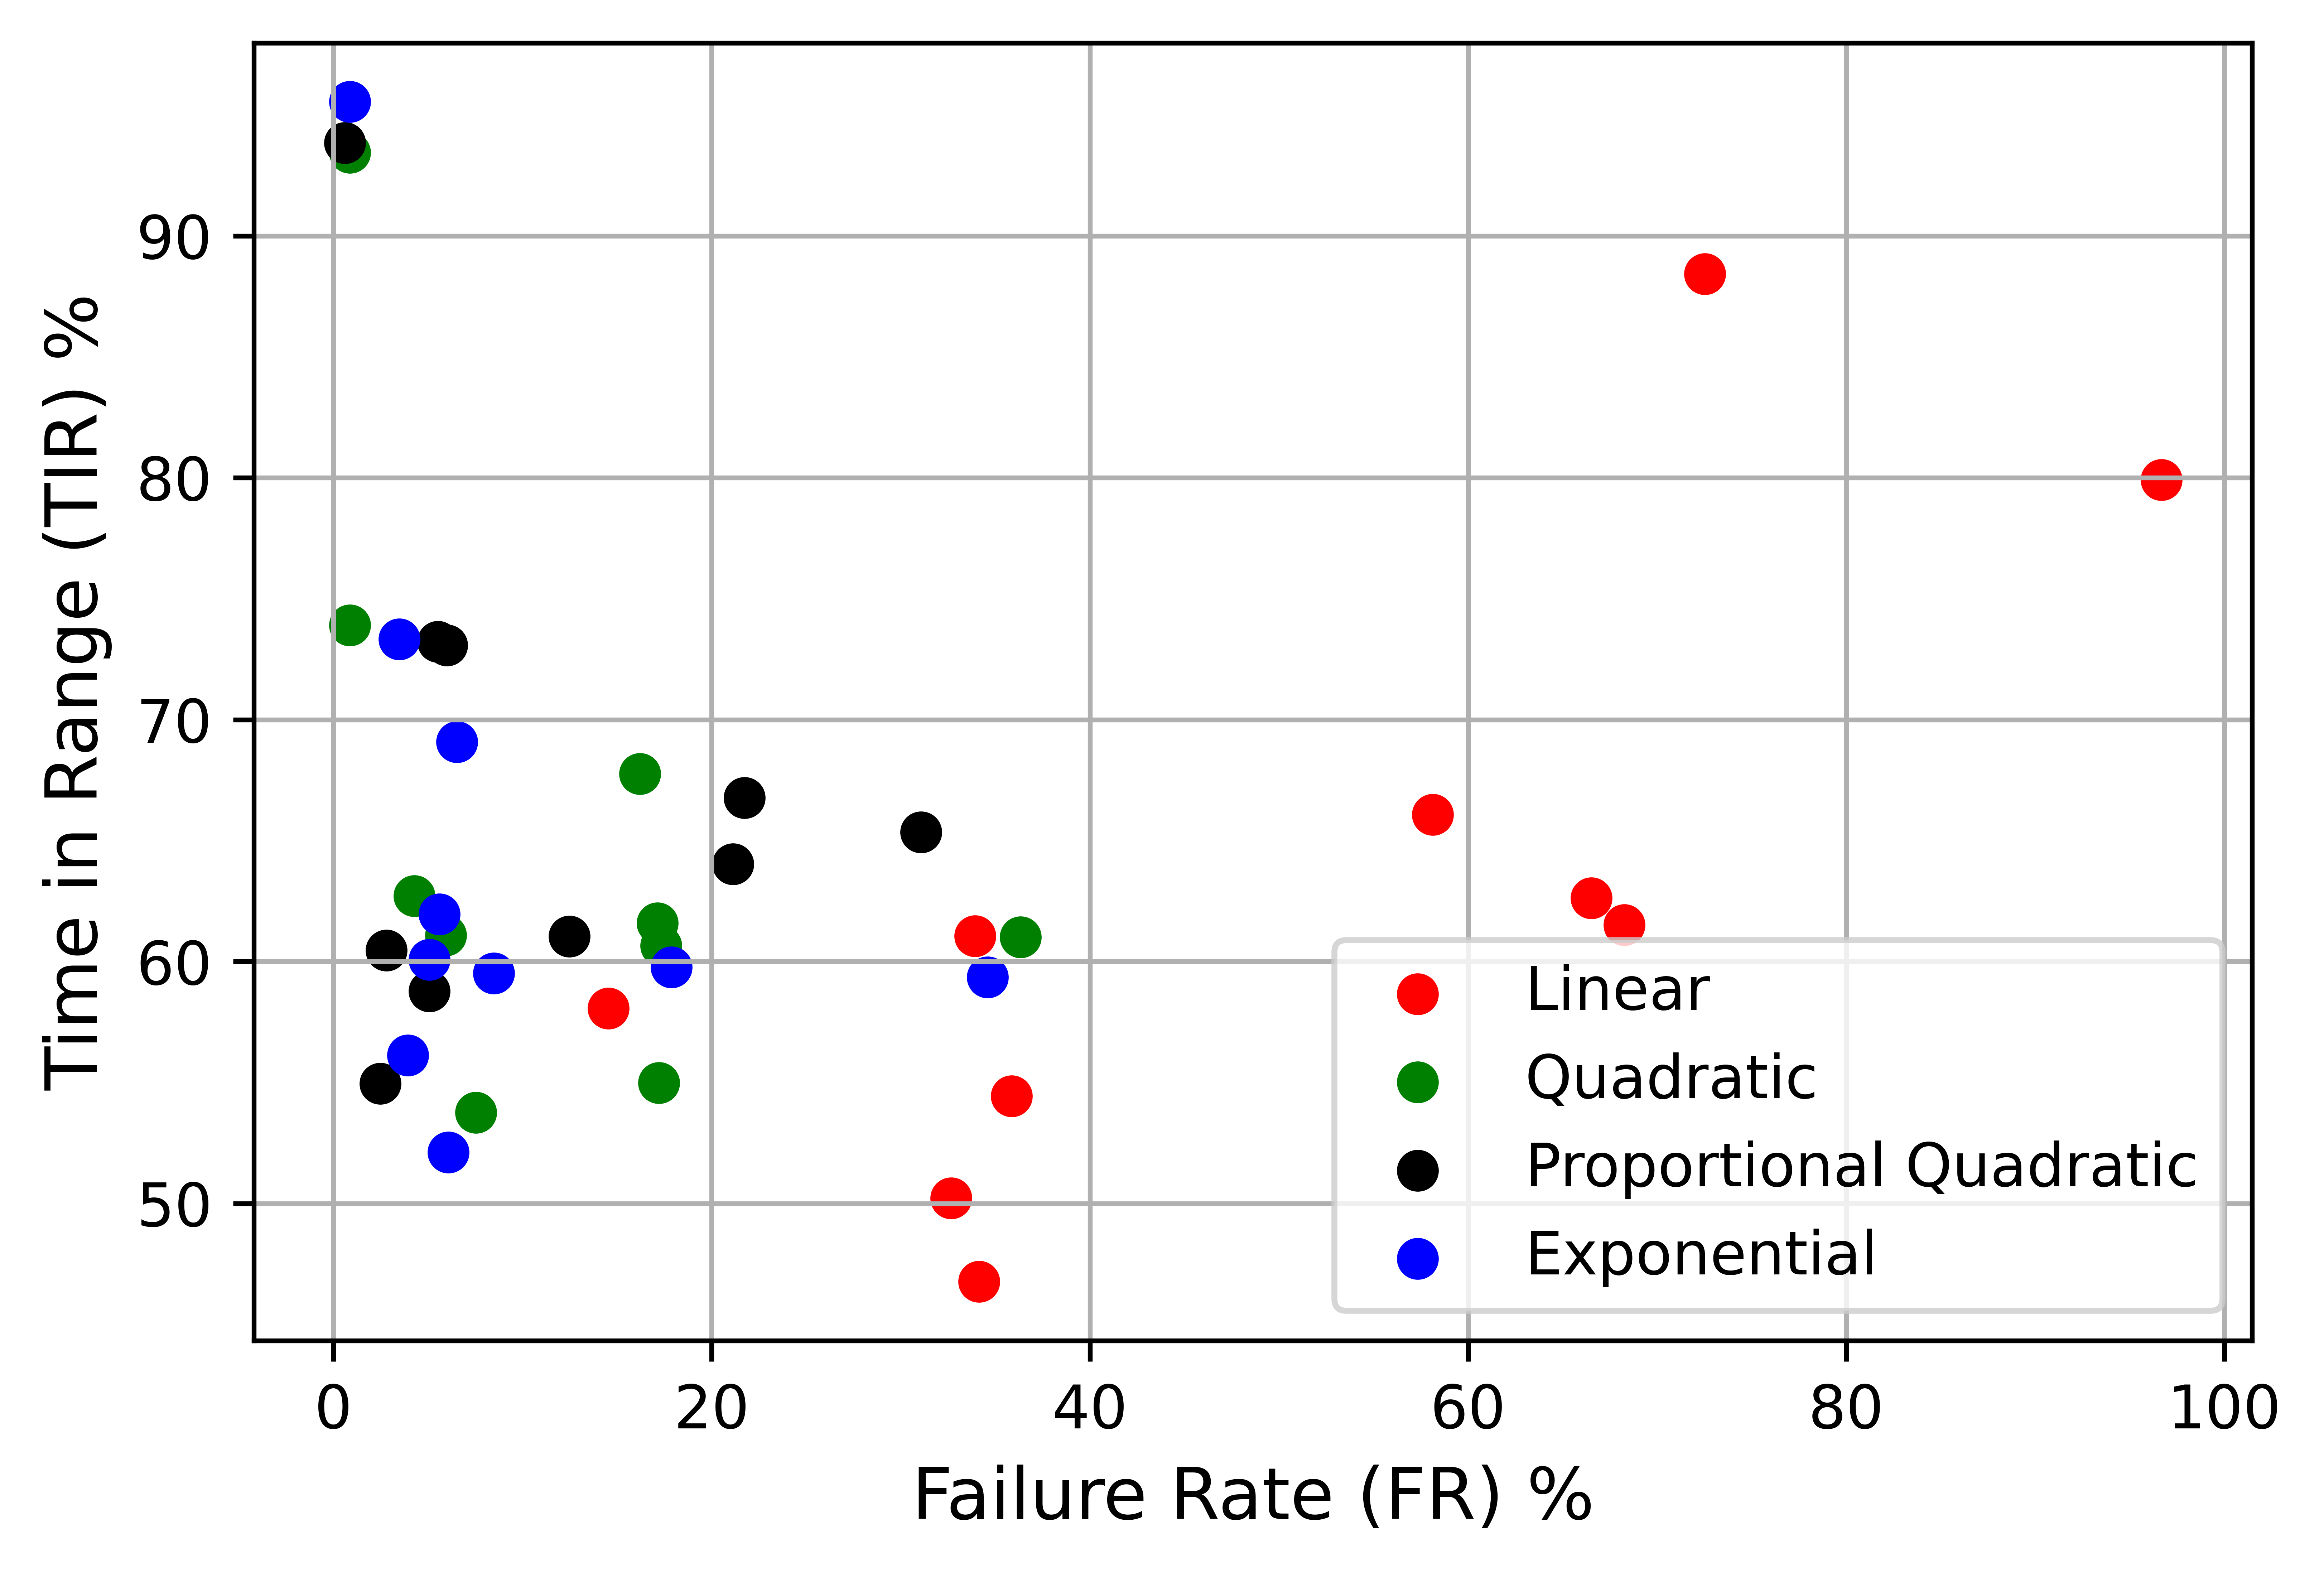

         exp  reward   fail  normo  reward_percent  subject  class
0     normal  151.34  72.53  88.42           52.55        0      0
1       quad  279.59   0.87  93.44           97.08        0      1
2   propquad  280.32   0.60  93.84           97.33        0      2
3        exp  280.85   0.87  95.54           97.52        0      3
4     normal  192.10  35.87  54.43           66.70        1      0
5       quad  228.18   7.53  53.75           79.23        1      1
6   propquad  235.45   2.47  54.95           81.75        1      2
7        exp  228.55   6.07  52.12           79.36        1      3
8     normal  219.13  32.67  50.22           76.09        2      0
9       quad  232.75  17.33  60.66           80.82        2      1
10  propquad  224.40  21.73  66.77           77.92        2      2
11       exp  252.60   5.60  61.96           87.71        2      3
12    normal  168.43  34.13  46.77           58.48        3      0
13      quad  254.22   4.27  62.71           88.27        3   

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
x = pd.read_csv('translation_summary.csv')

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1200

x['class'] = -1
x.loc[(x['exp'] == 'normal'),'class']= 0
x.loc[(x['exp'] == 'quad'),'class']= 1
x.loc[(x['exp'] == 'propquad'),'class']= 2
x.loc[(x['exp'] == 'exp'),'class']= 3
    
    
labels = ['Linear', 'Quadratic', 'Proportional Quadratic', 'Exponential']
c = ['r', 'g', 'k', 'b']
for y in range(0, 4):
    t = x.loc[x['class'] == y]
    plt.scatter(t['fail'], t['normo'], color=c[y])
#scatter = plt.scatter( x['fail'],x['normo'], c=x['class'])
# handles, _ = scatter.legend_elements(prop='colors')
plt.legend(labels, loc='lower right', fontsize=10)
plt.ylabel('Time in Range (TIR) %', fontsize=12)
plt.xlabel('Failure Rate (FR) %', fontsize=12)
plt.grid()
plt.savefig('a3_fig.png', dpi = 1200)
plt.show()

print(x)

In [36]:
#calculate the stat significance
# stats for the RL agent
import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
MAIN_PATH = '/home/users/u7041472/chirath/sys_control/'
sys.path.insert(1, MAIN_PATH)

from scipy import stats
from scipy.stats import kruskal, mannwhitneyu

def calc_stats(res, metric, sim_len):
    target_metrics = ['normo', 'hypo', 'hyper', 'S_hypo', 'S_hyper', 'lgbi', 'hgbi', 'ri', 'reward']
    failures = res[res['t'] < sim_len].count()['t']
    tot = res.shape[0]
    #res = res[res['t'] == sim_len]  # only the completed simulations for calc
    res = res[target_metrics].describe().loc[metric]
    res['fail'] = (failures / tot) * 100
    target_metrics.append('fail')
    res = res[target_metrics].round(2) 
    return res 

def summary_results(d, sub):
    seeds = ['1', '2', '3']
    n_trials = 500
    PATH = d
    cohort, summary_stats = [], []
    data = []
    for s in seeds:
        FOLDER_PATH='results/'+PATH+sub+s+'/testing/data'
        for i in range(0, n_trials):
            test_i = 'testing_episode_summary_'+str(6000+i)+'.csv'
            df = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+test_i)
            data.append(df)

    res = pd.concat(data)
    res['PatientID'] = sub
    return res
        

subjects = ['folder0/', 'folder1/', 'folder/', 'folder3/', 'folder4/', 'folder5/', 'folder6/', 'folder7/', 'folder8/', 'folder9/']
algo = ['normal', 'quad', 'propquad', 'exp']
metric = 'reward'


for i in range(0, 10):
    print('\n adolescent', i)
    res1 = summary_results(subjects[i], 'normal')
    res2 = summary_results(subjects[i], 'exp')
    print(stats.shapiro(res1[metric]))  # Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
    print(stats.shapiro(res2[metric]))
    print('kruksal test')
    stat, p = kruskal(res1[metric], res2[metric])
    print('stat, pvalue', (stat, p))
    if p > 0.05:
        print('Probably the same distribution')
    else:
        print('Probably different distributions')
    print('mannwhitneyU')
    stat, p = mannwhitneyu(res1[metric], res2[metric])
    print('stat, pvalue', (stat, p))
    if p > 0.05:
        print('Probably the same distribution')
    else:
        print('Probably different distributions')







 adolescent 0
ShapiroResult(statistic=0.8022347688674927, pvalue=2.2914144592516555e-39)
ShapiroResult(statistic=0.1369854211807251, pvalue=0.0)
kruksal test
stat, pvalue (1419.3103601236817, 1.33741801071907e-310)
Probably different distributions
mannwhitneyU
stat, pvalue (231340.0, 1.3384812233458e-310)
Probably different distributions

 adolescent 1
ShapiroResult(statistic=0.8039705753326416, pvalue=3.066879016424366e-39)
ShapiroResult(statistic=0.4741708040237427, pvalue=0.0)
kruksal test
stat, pvalue (427.7879429150289, 4.92430484961854e-95)
Probably different distributions
mannwhitneyU
stat, pvalue (634377.0, 4.926457133670829e-95)
Probably different distributions

 adolescent 2
ShapiroResult(statistic=0.861564040184021, pvalue=2.0527947130222504e-34)
ShapiroResult(statistic=0.36083388328552246, pvalue=0.0)
kruksal test
stat, pvalue (1665.4287914503898, 0.0)
Probably different distributions
mannwhitneyU
stat, pvalue (156952.5, 0.0)
Probably different distributions

 adolescent 3


 Experiment summary...
{'epi': {122: 124}, 't': {122: 288}, 'reward': {122: 280.39447}, 'normo': {122: 95.13888888888889}, 'hypo': {122: 0.0}, 'sev_hypo': {122: 0.0}, 'hyper': {122: 4.861111111111111}, 'lgbi': {122: 0.6595115}, 'hgbi': {122: 3.4704103}, 'ri': {122: 4.129922}, 'sev_hyper': {122: 0.0}, 'aBGP_rmse': {122: 232.56367}, 'cBGP_rmse': {122: 220.88658}}
{'epi': {122: 124}, 't': {122: 288}, 'reward': {122: 282.33392}, 'normo': {122: 95.48611111111111}, 'hypo': {122: 0.0}, 'sev_hypo': {122: 0.0}, 'hyper': {122: 4.513888888888889}, 'lgbi': {122: 0.66143495}, 'hgbi': {122: 2.6727426}, 'ri': {122: 3.3341775}, 'sev_hyper': {122: 0.0}, 'aBGP_rmse': {122: 239.84413}, 'cBGP_rmse': {122: 224.3057}}
{'epi': {122: 124}, 't': {122: 288}, 'reward': {122: 281.91998}, 'normo': {122: 100.0}, 'hypo': {122: 0.0}, 'sev_hypo': {122: 0.0}, 'hyper': {122: 0.0}, 'lgbi': {122: 1.2260523}, 'hgbi': {122: 2.2538662}, 'ri': {122: 3.4799185}, 'sev_hyper': {122: 0.0}, 'aBGP_rmse': {122: 230.45631}, 'cBGP_rm

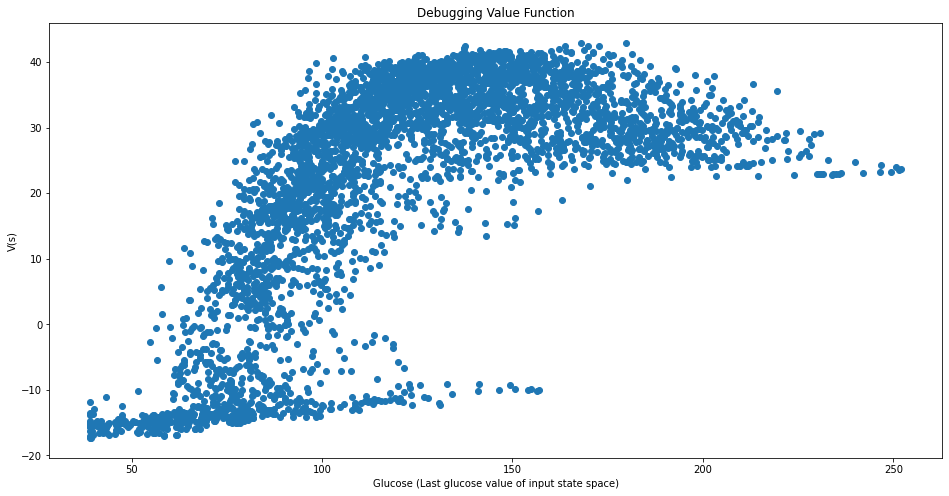

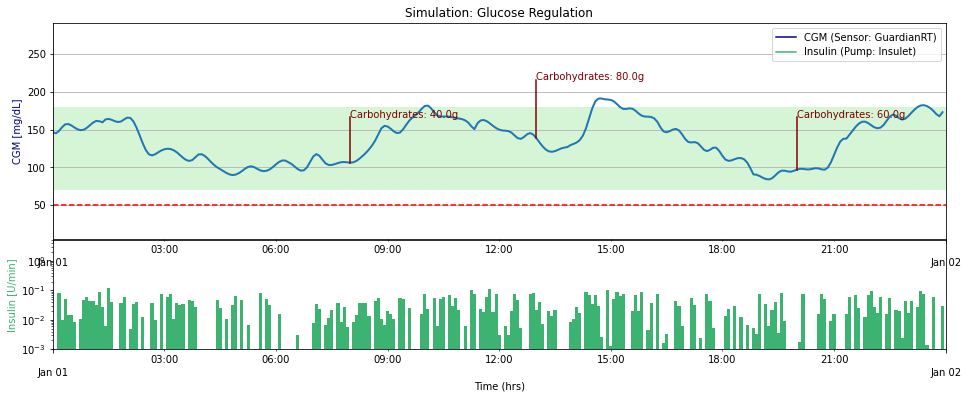

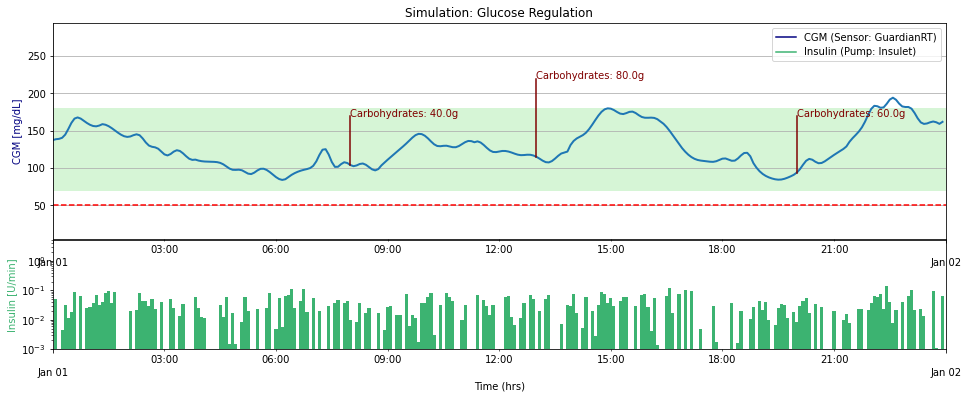

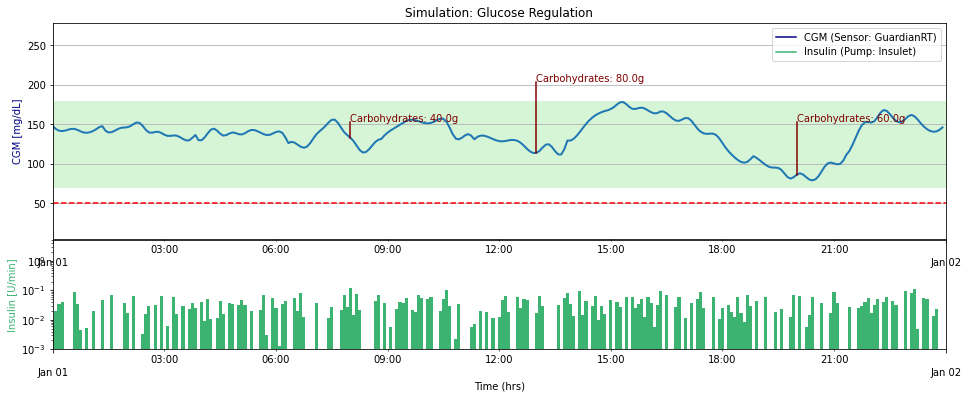

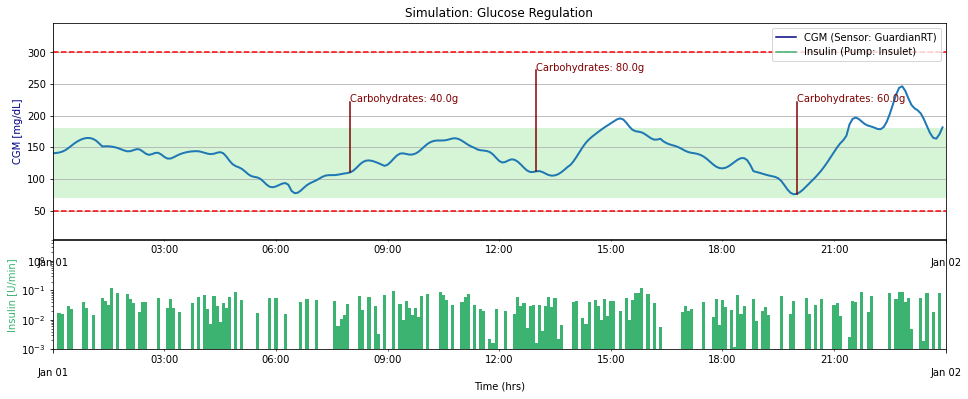

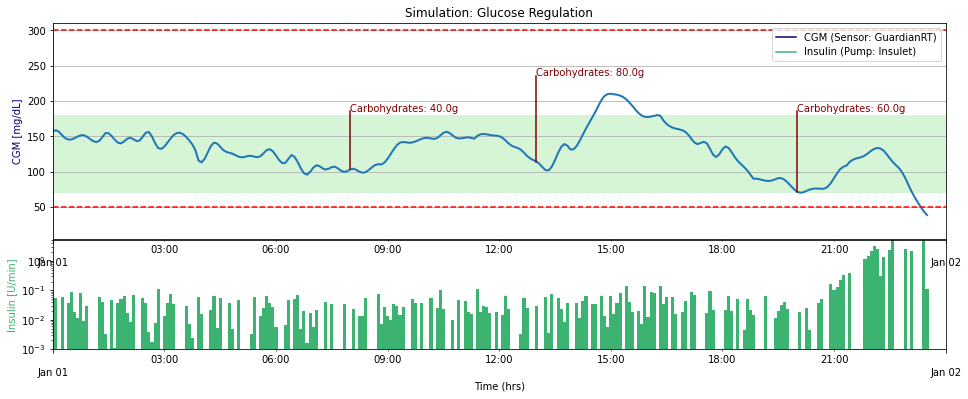

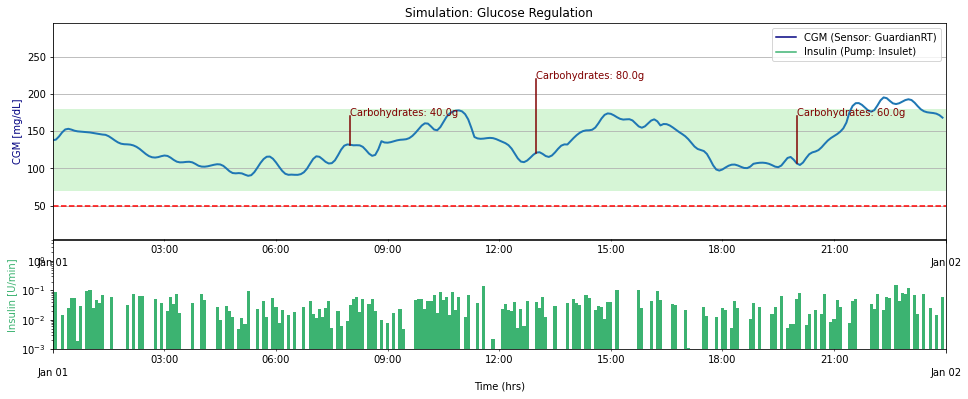

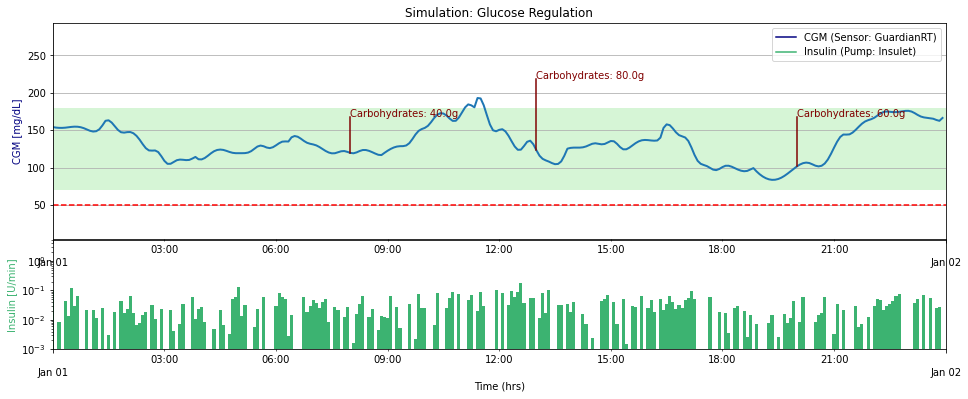

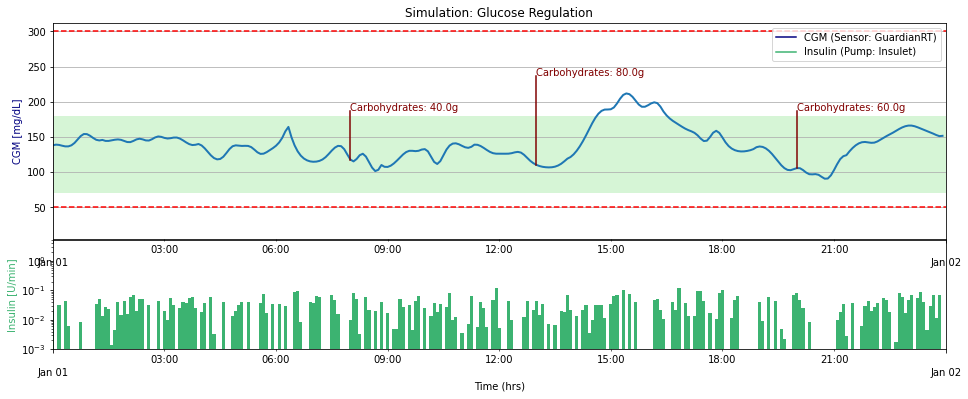

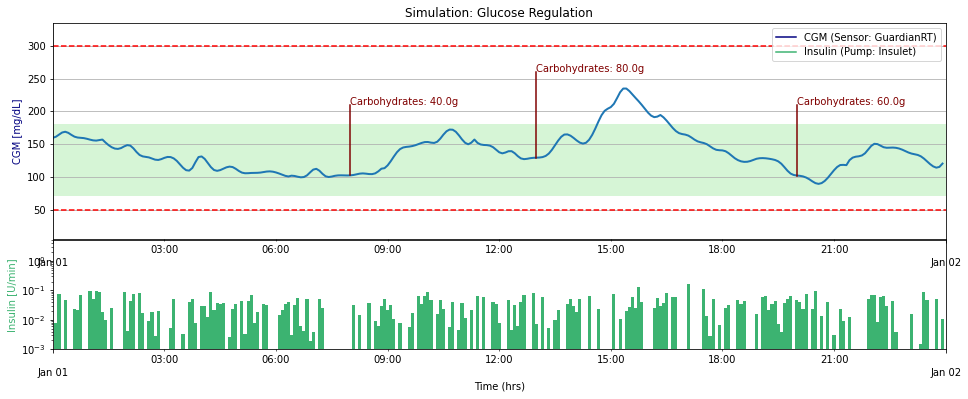

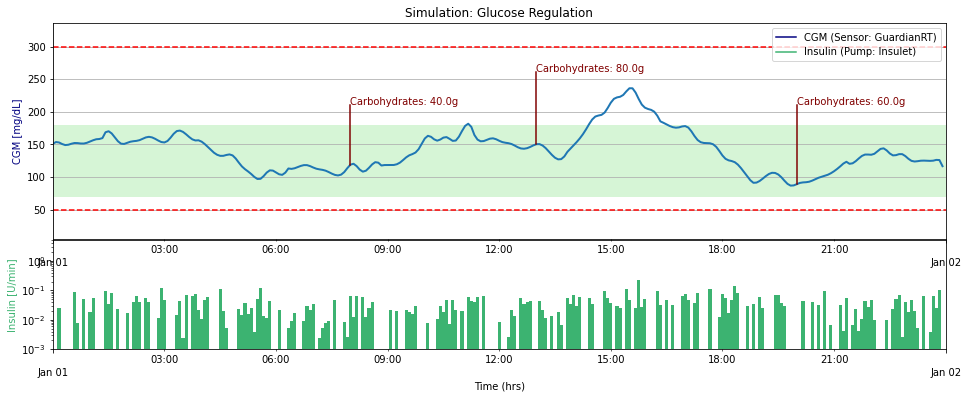

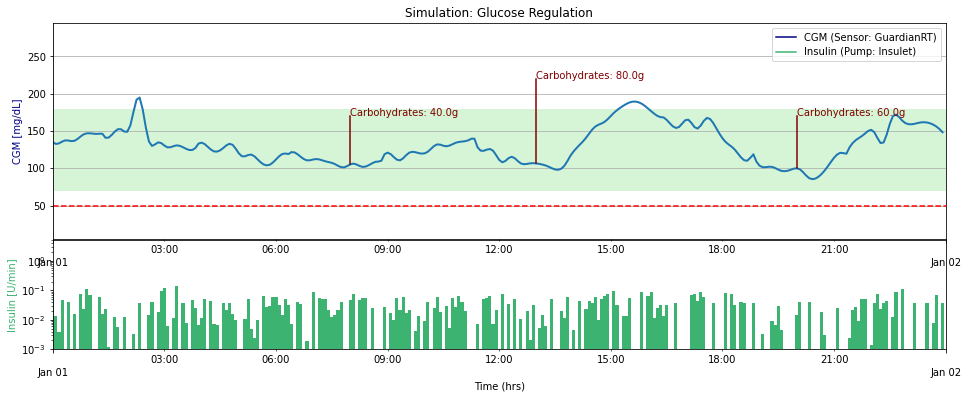

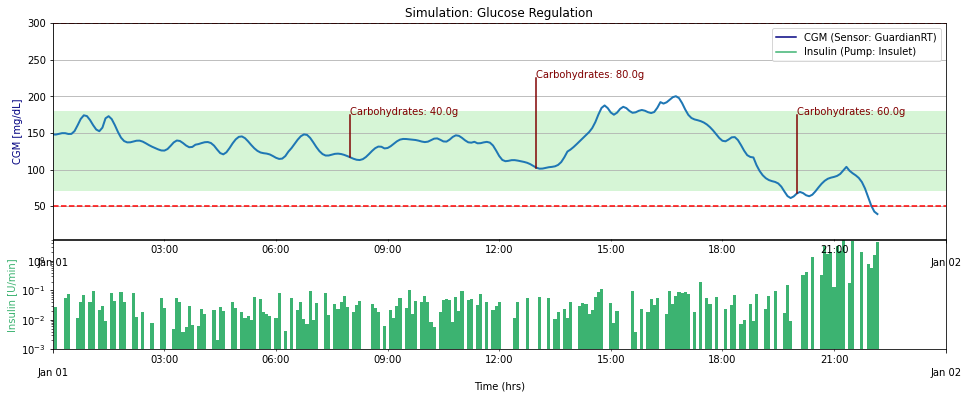

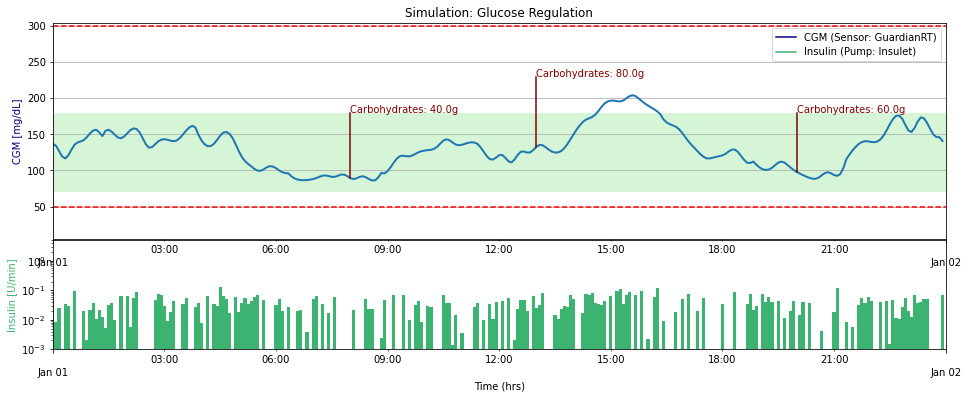

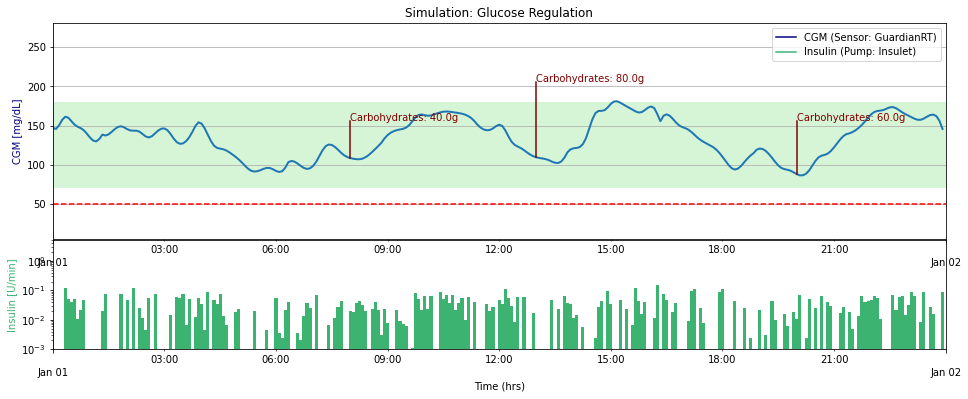

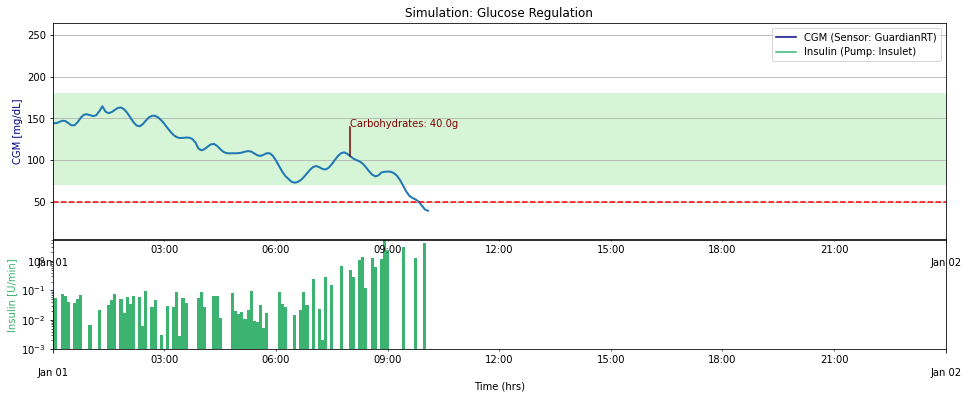

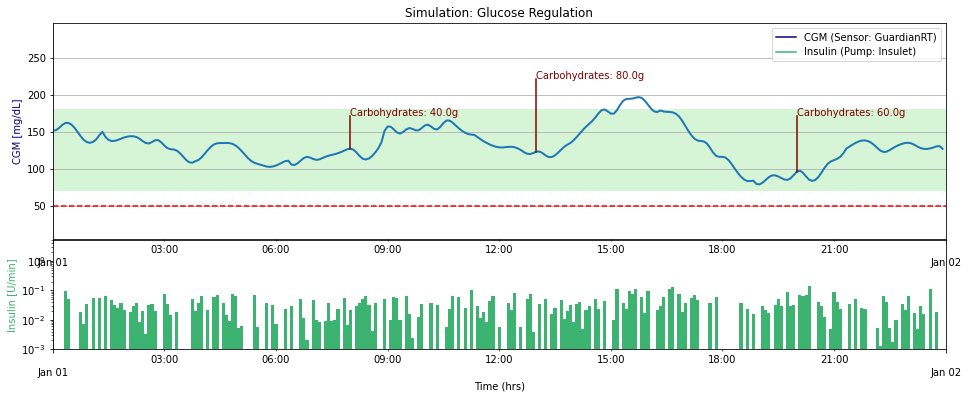

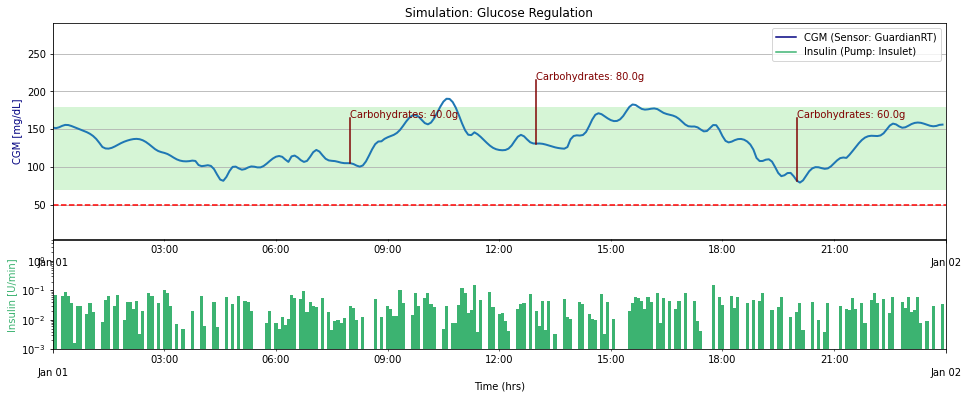

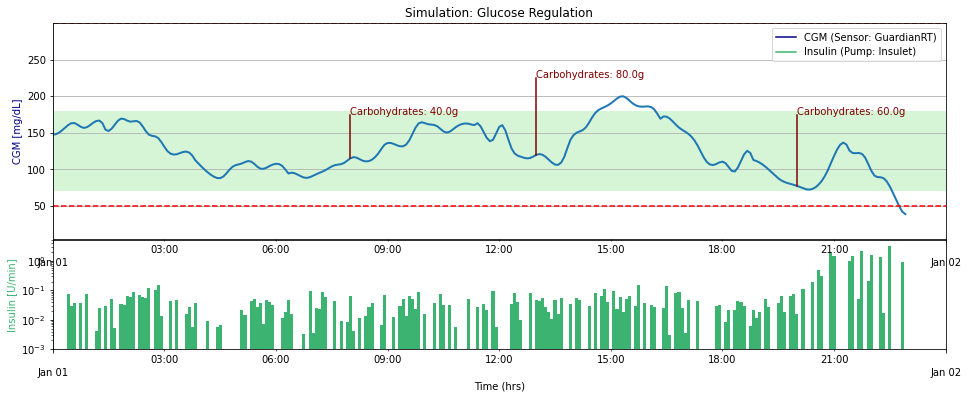

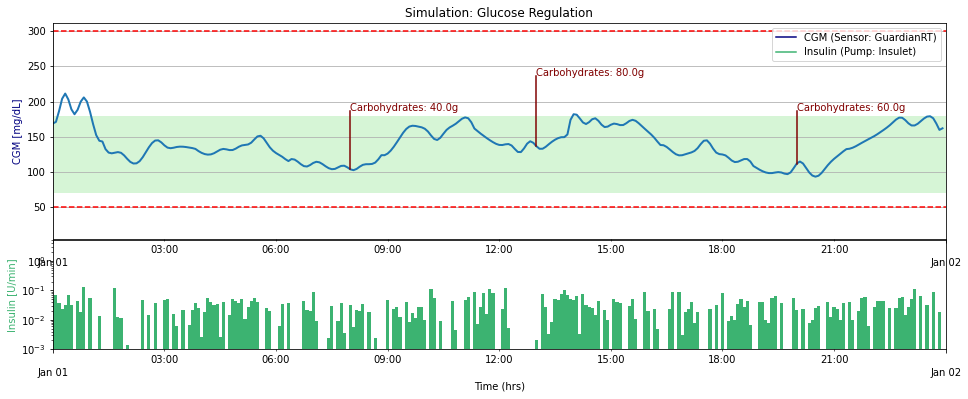

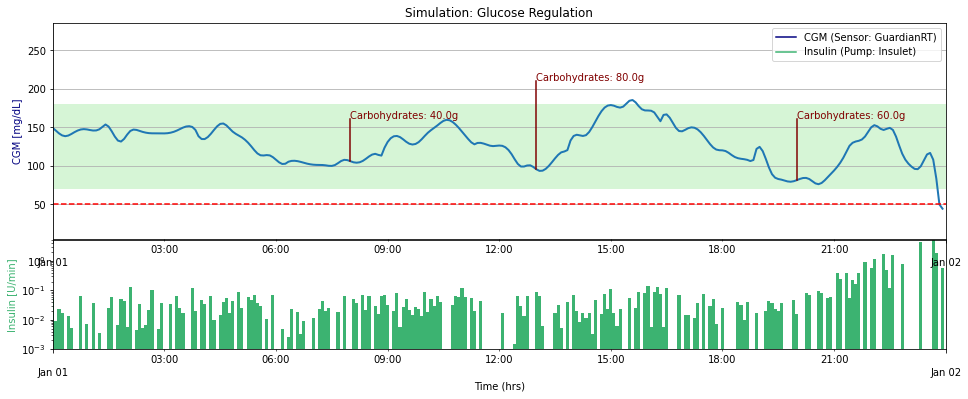

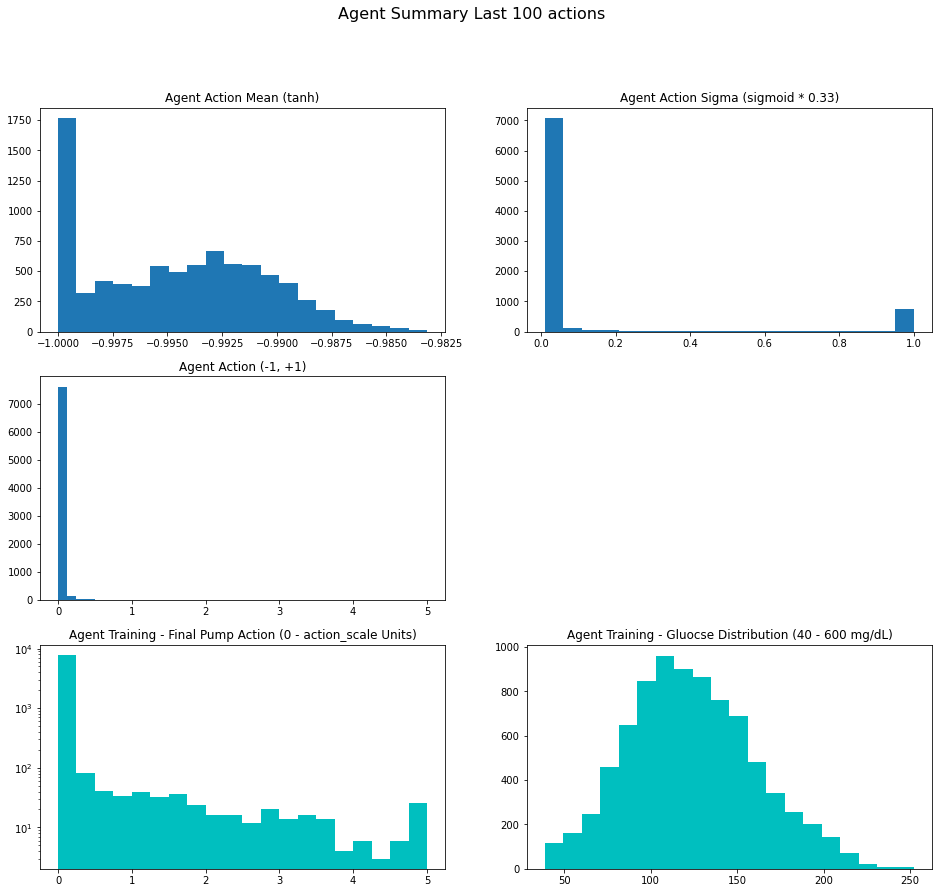

In [5]:
## debugging a given experimentset_args
target_exp = exp1
latest_epi = target_exp.get_summary()
target_epi = latest_epi
plot_value_function(target_exp, horizon=256)
for t in range(0, target_exp.testing_workers):
    plot_episode(target_exp, tester=t, episode=target_epi)
plot_training_action_summary(target_exp, horizon=512)

In [370]:
# stats for the RL agent

import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
MAIN_PATH = '/home/users/u7041472/chirath/sys_control/'
sys.path.insert(1, MAIN_PATH)


def calc_stats(res, metric):
    target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
    failures = res[res['t'] < 312].count()['t']
    res = res[res['t'] == 312]  # only the completed simulations for calc
    res = res[target_metrics].describe().loc[metric]
    res['fail'] = failures
    target_metrics.append('fail')
    res = res[target_metrics].round(2) 
    return res
    
    
# nov22_embc_A1_avg    

n_trials = 1000
subjects = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']
#subjects = ['A1', 'A3', 'A4', 'A6', 'A7', 'A9', 'A10']
cohort, summary_stats = [], []
for s in subjects:
    data = []
    FOLDER_PATH='/results/dec14_embc_'+s+'_avg/testing/data'
    for i in range(0, n_trials):
        test_i = 'testing_episode_summary_'+str(6000+i)+'.csv'
        df = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+test_i)
        data.append(df)
    res = pd.concat(data)
    res['PatientID'] = s
    summary_stats.append(res)
    
    print(s)
    print(calc_stats(res, metric=['mean', 'min', 'max']))
    
    res = calc_stats(res, metric=['mean'])   # 'min', 'max'
    res['exp'] = s
    cohort.append(res)
 
full = pd.concat(cohort)
full.set_index('exp', inplace=True)
sum_stats = pd.concat(summary_stats)

print(full)
r = calc_stats(sum_stats, metric=['mean', 'min', 'max'])
print(r)

A1
      normo   hypo  hyper  sev_hypo  sev_hyper   lgbi   hgbi     ri  fail
mean  64.05   1.57  31.46      0.07       2.85   2.01   9.71  11.72    15
min   31.73   0.00   0.00      0.00       0.00   0.00   2.04   3.76    15
max   96.15  24.04  63.46      5.45      22.12  11.96  20.16  24.90    15
A2
       normo   hypo  hyper  sev_hypo  sev_hyper  lgbi   hgbi     ri  fail
mean   69.89   0.45  29.01      0.01       0.64  1.11   7.59   8.71     7
min    36.54   0.00   0.00      0.00       0.00  0.00   1.56   2.08     7
max   100.00  12.50  60.26      3.53      13.14  8.68  16.05  18.41     7
A3
      normo   hypo  hyper  sev_hypo  sev_hyper   lgbi   hgbi     ri  fail
mean  69.15   2.61  22.24      0.26       5.74   2.52  10.54  13.06   139
min   33.65   0.00   0.00      0.00       0.00   0.00   2.50   4.00   139
max   91.35  21.15  49.36      8.01      21.15  16.46  24.45  32.92   139
A4
      normo   hypo  hyper  sev_hypo  sev_hyper   lgbi   hgbi     ri  fail
mean  66.00   4.76  21.47 

In [99]:
def cohort_stats(FOLDER_PATH, control_type='real', individual_stats=False):
    arr = []
    print('Summary stats for {}'.format(control_type))
    manual_control = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
    target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
    
    
    failures = manual_control[manual_control['survival'] < 312].count()['survival']
    
    #print('Number of Catestrophic failures: {}'.format(failures))

    filered_manual_control = manual_control[manual_control['survival'] == 312]    
    t_cohort = filered_manual_control[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
    #print(manual_control[target_metrics].describe())
    t_cohort['failure'] = failures
    t_cohort['subject'] = 1000
    arr.append(t_cohort)
    
    if individual_stats:
        #print('\n##################Individual Stats#######################')
        for subject_id in range(20, 30):
            print('\nSubject ID: {}'.format(subject_id))
            subject = manual_control.loc[manual_control['PatientID'] == subject_id]
            failures = subject[subject['survival'] < 312].count()['survival']
            
            subject = subject[subject['survival'] == 312]    
            #t_sub = subject[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
            t_sub = subject[target_metrics].describe().loc[['mean']]
            t_sub['failure'] = failures
            t_sub['subject'] = subject_id
            print('Number of Catestrophic failures: {}'.format(failures))
            arr.append(t_sub)
            print(t_sub)


    final = pd.concat(arr)
    final['mode'] = control_type
    #print(final)
    #final.to_csv(control_type+'.csv')
    return final
        
FOLDER_PATH='/results/embc14_real'    
f1 = cohort_stats(FOLDER_PATH, control_type='real', individual_stats=True)

FOLDER_PATH='/results/embc14_quadratic'    
f2 = cohort_stats(FOLDER_PATH, control_type='quadratic', individual_stats=True)
#full = pd.concat([f1, f2])
#print(full)
#full.to_csv('full_results_manual_control.csv')


Summary stats for real

Subject ID: 20
Number of Catestrophic failures: 36
          normo      hypo      hyper  sev_hypo  sev_hyper      lgbi      hgbi  \
mean  69.102764  2.315738  28.054181  0.121356   0.405961  2.384251  7.587342   

            ri  failure  subject  
mean  9.971593       36       20  

Subject ID: 21
Number of Catestrophic failures: 3
          normo     hypo     hyper  sev_hypo  sev_hyper      lgbi      hgbi  \
mean  90.103644  0.25686  9.599311  0.006108   0.034077  0.844296  3.384868   

            ri  failure  subject  
mean  4.229164        3       21  

Subject ID: 22
Number of Catestrophic failures: 55
          normo      hypo      hyper  sev_hypo  sev_hyper      lgbi      hgbi  \
mean  70.826889  2.551214  26.055827  0.181794   0.384276  3.067901  7.419369   

            ri  failure  subject  
mean  10.48727       55       22  

Subject ID: 23
Number of Catestrophic failures: 14
          normo      hypo      hyper  sev_hypo  sev_hyper      lgbi      hg

real
690
           normo       hypo      hyper   sev_hypo  sev_hyper       lgbi  \
mean   71.053131   2.187724  24.952614   0.332676   1.473854   2.864151   
std    12.890716   3.592842  10.296977   1.084217   5.112085   3.235323   
min     8.860760   0.000000   0.000000   0.000000   0.000000   0.000000   
max   100.000000  30.769230  71.551730  16.959064  80.590710  22.051207   

           hgbi         ri  
mean   7.620674  10.484825  
std    3.924464   6.169289  
min    1.789013   1.845144  
max   57.820187  76.844830  
quadratic
328
           normo       hypo      hyper   sev_hypo  sev_hyper       lgbi  \
mean   69.360132   1.064259  27.490189   0.161047   1.924372   1.790704   
std    12.350792   2.620374  10.311082   0.791841   5.182413   2.688906   
min     9.282701   0.000000   0.000000   0.000000   0.000000   0.000000   
max   100.000000  22.115385  69.551285  14.705882  80.590710  22.915808   

           hgbi         ri  
mean   8.071870   9.862574  
std    3.850129   5.74

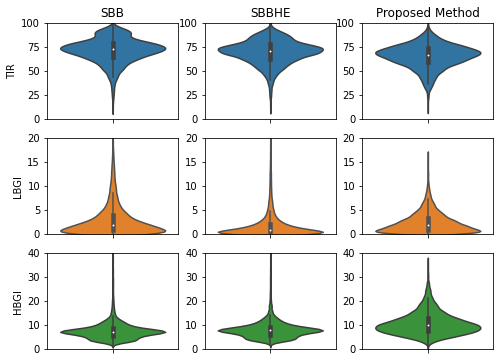

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns


filter_bad = False

target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
FOLDER_PATH='/results/embc14_real'
control_type = 'real'
f1 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f1[f1['survival'] < 312].count()['survival']
print('real')
print(failures)
if filter_bad:
    f1 = f1[f1['survival'] == 312]
t1 = f1[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t1)

FOLDER_PATH='/results/embc14_quadratic'
control_type = 'quadratic'
f2 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f2[f2['survival'] < 312].count()['survival']
print('quadratic')
print(failures)
if filter_bad:
    f2 = f2[f2['survival'] == 312]
t2 = f2[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t2)

if filter_bad:
    sum_stats = sum_stats[sum_stats['t'] == 312]
c = sns.color_palette() 

fig = plt.figure(figsize=(8, 6))
plt.subplot(3, 3, 1)
g2 = sns.violinplot(y=f1['normo'])
g2.set(ylabel="TIR")
g2.set(ylim=(0, 100))
plt.title("SBB")

plt.subplot(3, 3, 2)
g2 = sns.violinplot(y=f2['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("SBBHE")
#plt.ylabel()

plt.subplot(3, 3, 3)
g2 = sns.violinplot(y=sum_stats['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("Proposed Method")

plt.subplot(3, 3, 4)
g2 = sns.violinplot(y=f1['lgbi'], color=c[1])
g2.set(ylabel="LBGI")
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 5)
g2 = sns.violinplot(y=f2['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 6)
g2 = sns.violinplot(y=sum_stats['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 7)
g2 = sns.violinplot(y=f1['hgbi'], color=c[2])
g2.set(ylabel="HBGI")
g2.set(ylim=(0, 40))


plt.subplot(3, 3, 8)
g2 = sns.violinplot(y=f2['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

plt.subplot(3, 3, 9)
g2 = sns.violinplot(y=sum_stats['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

# sns.violinplot(y=sum_stats['normo'])
#axes.violinplot(dataset = [sum_stats['normo'].values],  showmedians=True, showmeans=True)
# axes.set_xticks([1])
# axes.set_xticklabels(["Normoglyceamia", ])
plt.show()


# boxplot = sum_stats.boxplot(column=['normo', 'lgbi', 'hgbi'])
# fig, axes = plt.subplots()
# axes.violinplot(dataset = [sum_stats['lgbi'].values, sum_stats['hgbi'].values], showmedians=True)
# plt.show()

In [10]:
# stats for the RL agent

import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
MAIN_PATH = '/home/users/u7041472/chirath/sys_control/'
sys.path.insert(1, MAIN_PATH)


def calc_stats(res, metric):
    target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
    failures = res[res['t'] < 312].count()['t']
    res = res[res['t'] == 312]  # only the completed simulations for calc
    res = res[target_metrics].describe().loc[metric]
    res['fail'] = failures
    target_metrics.append('fail')
    res = res[target_metrics].round(2) 
    return res
    
    
# nov22_embc_A1_avg    

n_trials = 100
subjects = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']
#subjects = ['A1', 'A3', 'A4', 'A6', 'A7', 'A9', 'A10']
cohort, summary_stats = [], []
for s in subjects:
    data = []
    # s == 'A3' or s == 'A6' or
    if s == 'A9':
        FOLDER_PATH='/results/dec7_embc_'+s+'_avg/testing/data'
    else:
        FOLDER_PATH='/results/dec3_embc_'+s+'_avg/testing/data'
    
    for i in range(0, n_trials):
        test_i = 'testing_episode_summary_'+str(6000+i)+'.csv'
        df = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+test_i)
        data.append(df)
    res = pd.concat(data)
    res['PatientID'] = s
    summary_stats.append(res)
    
    print(s)
    print(calc_stats(res, metric=['mean', 'min', 'max']))
    
    
    res = calc_stats(res, metric=['mean'])   # 'min', 'max'
    
    
    res['exp'] = s
    cohort.append(res)
 
full = pd.concat(cohort)
full.set_index('exp', inplace=True)
sum_stats = pd.concat(summary_stats)
print(full)
full.to_csv('combined.csv')
r = calc_stats(sum_stats, metric=['mean', 'min', 'max'])
print(r)

     normo  hypo  hyper  sev_hypo  sev_hyper  lgbi   hgbi     ri  fail
exp                                                                   
A1   66.27  0.84  29.97      0.04       2.89  1.32   8.96  10.28     1
A2   78.99  1.24  19.59      0.06       0.12  1.53   5.41   6.95     5
A3   63.02  1.19  25.41      0.03      10.35  1.99  14.09  16.08     2
A4   69.15  3.92  20.65      0.14       6.14  3.11  11.35  14.46     9
A5   68.91  1.64  26.20      0.16       3.10  1.82   8.98  10.79     3
A6   63.41  2.29  30.05      0.21       4.04  2.62  10.31  12.93    18
A7   71.52  5.74  21.51      0.35       0.88  3.92   7.56  11.48     7
A8   73.58  1.86  24.21      0.03       0.33  1.96   6.89   8.85     5
A9   48.38  1.04  32.38      0.04      18.16  1.64  17.91  19.56     1
A10  63.13  3.54  24.14      0.13       9.06  3.33  13.44  16.77     4
      normo   hypo  hyper  sev_hypo  sev_hyper   lgbi   hgbi     ri  fail
mean  66.57   2.30  25.42      0.12       5.59   2.31  10.53  12.84    55
